In [57]:
from typing import Annotated, Literal, Sequence, TypedDict

In [58]:
!pip install langgraph
!pip install langchain
!pip install langchain_community
!pip install langchainhub
!pip install langchain_groq

In [3]:
from langchain import hub

In [4]:
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser

In [5]:
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
!pip install langgraph

In [7]:
from langgraph.graph.message import add_messages

In [8]:
from langgraph.prebuilt import tools_condition

In [9]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.tools.retriever import create_retriever_tool
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode


In [10]:
!pip install langchain-huggingface

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
from huggingface_hub import hf_hub_download

In [12]:
embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:
from langchain_groq import ChatGroq

In [14]:
import os
from google.colab import userdata

In [15]:
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

In [16]:
llm = ChatGroq(model_name="Gemma2-9b-It", api_key=GROQ_API_KEY)

In [17]:
llm.invoke("hi, how are you")

AIMessage(content="As an AI, I don't have feelings or experiences like humans do. However, I'm here and ready to assist you! How can I help you today?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 14, 'total_tokens': 52, 'completion_time': 0.069090909, 'prompt_time': 7.5999e-05, 'queue_time': 0.019951841, 'total_time': 0.069166908}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-09e3e7f1-8264-4d62-bf8d-41f65e4211cb-0', usage_metadata={'input_tokens': 14, 'output_tokens': 38, 'total_tokens': 52})

In [18]:
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/"
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"
]

In [19]:
docs = [WebBaseLoader(url).load() for url in urls]

In [20]:
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'title': "404 Page not found | Lil'Log", 'description': 'Document my learning notes.', 'language': 'en'}, page_content="\n\n\n\n\n\n404 Page not found | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n404\n\n\n© 2024 Lil'Log\n\n        Powered by\n        Hugo &\n        PaperMod\n\n\n\n\n\n\n\n\n\n\n\n\n")]]

In [21]:
docs[0][0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/',
 'title': "404 Page not found | Lil'Log",
 'description': 'Document my learning notes.',
 'language': 'en'}

In [22]:
from langchain_community.document_loaders import WebBaseLoader
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"
]
docs = []
for url in urls:
    try:
        loaded_docs = WebBaseLoader(url).load()
        docs.append(loaded_docs)
        print(f"Loaded documents from {url}: {loaded_docs}")
    except Exception as e:
        print(f"Error loading documents from {url}: {e}")

# Now, attempt to access the metadata again
try:
    print(docs[1][0].metadata)  # This might still raise an IndexError
except IndexError:
    print("IndexError still occurred. Check the loaded documents.")

Loaded documents from https://lilianweng.github.io/posts/2023-06-23-agent/: [Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes a

In [23]:
docs[1][0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/',
 'title': "Prompt Engineering | Lil'Log",
 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.',
 'language': 'en'}

In [24]:
docs_list = [item for sublist in docs for item in sublist]

In [25]:
docs_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [26]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.9 MB/s eta 0:00:00


In [27]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=5) #object for textsplitter

In [28]:
doc_split = text_splitter.split_documents(docs_list)

In [29]:
doc_split

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [30]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00


In [31]:
VectorStore = Chroma.from_documents(
    documents=doc_split,
    collection_name="rag-chrome",
    embedding=embedding
)

In [32]:
retriever = VectorStore.as_retriever()

In [33]:
retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_blog_posts",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",

)

In [34]:
tools=[retriever_tool]

In [100]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
  messages: Annotated[Sequence[BaseMessage], add_messages]

In [101]:
from langchain_core.pydantic_v1 import BaseModel, Field

class grade(BaseModel):
  BinaryScore: str = Field(description="Relevance yes or No")

In [114]:
def AI_assistant(state:AgentState):
  print("--- CALL AGENT ---")
  messages = state['messages']
  llm_with_tool = llm.bind_tools(tools)
  response = llm_with_tool.invoke(messages)
  return {"messages" : [response]}

In [115]:
def rewriter(state:AgentState):
  print("---TRANSFORM QUERY---")
  messages = state["messages"]
  question = messages[0].content
  message = [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning.
                    Here is the initial question: {question}
                    Formulate an improved question: """)
       ]
  response = llm.invoke(message)
  return {"messages": [response]}

In [116]:
def generate(state:AgentState):
  print("---GENERATE---")
  messages = state["messages"]
  question = messages[0].content
  last_message = messages[-1]
  docs = last_message.content
  prompt = hub.pull("rlm/rag-prompt")
  rag_chain = prompt | llm | StrOutputParser()
  response = rag_chain.invoke({"context": docs, "question": question})
  return {"messages": [response]}

In [126]:
def grade_documents(state:AgentState)->Literal["generator", "rewriter"]:
    llm_with_structure_op=llm.with_structured_output(grade)

    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant.
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
    chain = prompt | llm_with_structure_op

    messages = state["messages"]
    print(f"message from the grader: {messages}")
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.BinaryScore

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generator" #this should be a node name
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewriter" #this should be a node name

In [127]:
workflow=StateGraph(AgentState)

In [128]:
workflow.add_node("AI_assistant", AI_assistant)
retriever = ToolNode([retriever_tool])
workflow.add_node("retriever", retriever)
workflow.add_node("rewriter", rewriter)
workflow.add_node("generator", generate )

In [129]:
workflow.add_edge(START, "AI_assistant")
workflow.add_conditional_edges("AI_assistant", tools_condition,
                               {"tools":"retriever",
                                END:END})


In [130]:
workflow.add_conditional_edges("retriever",
                            grade_documents,
                            {"generator": "generator",
                            "rewriter": "rewriter"
                            }
                            )

In [131]:
workflow.add_edge("generator", END)
workflow.add_edge("rewriter", "AI_assistant")

In [132]:
app=workflow.compile()

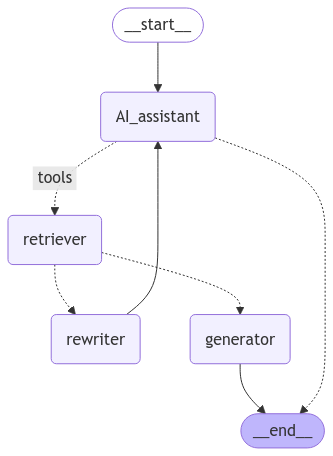

In [133]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


In [134]:
app.invoke({"messages":["What is a Autonomous Agent?"]})

--- CALL AGENT ---
message from the grader: [HumanMessage(content='What is a Autonomous Agent?', additional_kwargs={}, response_metadata={}, id='6ce958a4-6547-4c05-9250-b10fed562620'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_f2f2', 'function': {'arguments': '{"query":"What is an autonomous agent?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1039, 'total_tokens': 1127, 'completion_time': 0.16, 'prompt_time': 0.041704819, 'queue_time': 0.022239807000000007, 'total_time': 0.201704819}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0a3553a3-50c6-475d-a487-6fbfbc392137-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is an autonomous agent?'}, 'id': 'call_f2f2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 88, 'total_tokens': 1127}), Tool

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


{'messages': [HumanMessage(content='What is a Autonomous Agent?', additional_kwargs={}, response_metadata={}, id='6ce958a4-6547-4c05-9250-b10fed562620'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_f2f2', 'function': {'arguments': '{"query":"What is an autonomous agent?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1039, 'total_tokens': 1127, 'completion_time': 0.16, 'prompt_time': 0.041704819, 'queue_time': 0.022239807000000007, 'total_time': 0.201704819}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0a3553a3-50c6-475d-a487-6fbfbc392137-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is an autonomous agent?'}, 'id': 'call_f2f2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 88, 'total_tokens': 1127}),
  ToolMessage(content='LLM Powere

In [135]:
app.invoke({"messages":["who is a current prime minister of india?"]})

--- CALL AGENT ---
message from the grader: [HumanMessage(content='who is a current prime minister of india?', additional_kwargs={}, response_metadata={}, id='a94e7e62-430d-449c-a3a2-cb193da9c10f'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xy9d', 'function': {'arguments': '{"query":"who is the current prime minister of india"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1042, 'total_tokens': 1133, 'completion_time': 0.165454545, 'prompt_time': 0.033187239, 'queue_time': 0.022611907, 'total_time': 0.198641784}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-33afc82b-6ec2-4e95-a8db-c09d50d4dd1e-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'who is the current prime minister of india'}, 'id': 'call_xy9d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1042, 'output_t

{'messages': [HumanMessage(content='who is a current prime minister of india?', additional_kwargs={}, response_metadata={}, id='a94e7e62-430d-449c-a3a2-cb193da9c10f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xy9d', 'function': {'arguments': '{"query":"who is the current prime minister of india"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1042, 'total_tokens': 1133, 'completion_time': 0.165454545, 'prompt_time': 0.033187239, 'queue_time': 0.022611907, 'total_time': 0.198641784}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-33afc82b-6ec2-4e95-a8db-c09d50d4dd1e-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'who is the current prime minister of india'}, 'id': 'call_xy9d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1042, 'output_tokens': 91, 'total_tokens': 1